In [1]:
%matplotlib inline
import numpy as np
from scipy.misc import imread
import pickle
import matplotlib.pyplot as plt
from scipy.misc import imread
import tensorflow as tf
from keras.preprocessing import image
from keras.backend.tensorflow_backend import set_session
from ssd import SSD300
from keras.applications.imagenet_utils import preprocess_input
from ssd_utils import BBoxUtility


# config = tf.ConfigProto(
#     gpu_options=tf.GPUOptions(
#         allow_growth=True 
#     )
# )
# sess = sess = tf.Session(config=config)



Using TensorFlow backend.


In [2]:
NYU_CLASSES = ['bed', 'shelf', 'computer', 'plate', 'lamp', 'garbage_bin', 'sofa', 'chair', 'pillow',
               'box', 'table', 'projector', 'door', 'monitor']
NUM_CLASSES = len(NYU_CLASSES) + 1
input_shape = (300, 300, 3) #channel last

In [3]:
# model = SSD300(input_shape, num_classes=NUM_CLASSES)
# model.load_weights('../checkpoints/SUNRGBD/weights.best.hdf5')

In [4]:
gt = pickle.load(open('../pkls/SUNRGBD/RGB_v3.pkl', 'rb'))
keys = sorted(gt.keys())
num_train = int(round(0.8 * len(keys)))
train_keys = keys[:num_train]
val_keys = keys[num_train:]
num_val = len(val_keys)

In [15]:
path_prefix = '../dataset/'
inputs = []
images = []
num = 134

img_path = path_prefix + sorted(val_keys)[num]
print(path_prefix + sorted(val_keys)[num])
img = image.load_img(img_path)
img = image.img_to_array(img)
print(img.shape)
images.append(imread(img_path))
inputs.append(img.copy())
inputs = preprocess_input(np.array(inputs))

# img_path = path_prefix + sorted(keys)[3]
# img = image.load_img(img_path)
# img = image.img_to_array(img)

../dataset/SUNRGBD/xtion/sun3ddata/mit_32_144/classroom_32144_nov_2_2012_scan1_erika/0007420-000332548259//image/0007420-000332548259.jpg
(441, 591, 3)


In [16]:
# priors = pickle.load(open('../pkls/prior_boxes_ssd300.pkl', 'rb'))
# bbox_util = BBoxUtility(NUM_CLASSES, priors)
# preds = model.predict(inputs, batch_size=1, verbose=1)
# results = bbox_util.detection_out(preds)

In [17]:
#train_keys[0]
results = gt[val_keys[num]]
print(results[0])

[ 0.65522374  0.31960461  0.83050137  0.69645868  0.          0.          0.
  0.          0.          0.          0.          1.          0.          0.
  0.          0.          0.          0.        ]


(441, 591, 3)
166
(441, 591, 3)
197
(441, 591, 3)
245
(441, 591, 3)
181
(441, 591, 3)
273


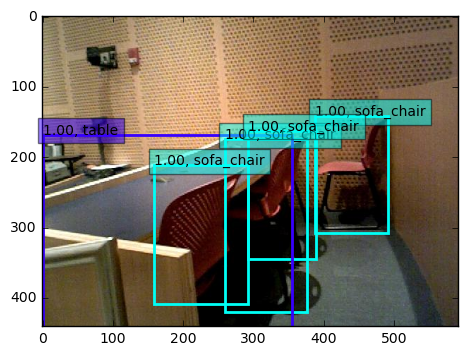

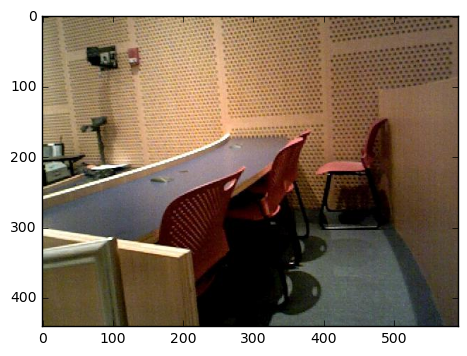

In [18]:
        
# colors = plt.cm.hsv(np.linspace(0, 1, 12)).tolist()
# currentAxis = plt.gca()
# plt.imshow(img / 255.)
# for array in results:
#     top_indices = [i for i, conf in enumerate(det_conf) if conf >= 0.8]
#     xmin = int(round(array[0] * img.shape[1]))
#     ymin = int(round(array[1] * img.shape[0]))
#     xmax = int(round(array[2] * img.shape[1]))
#     ymax = int(round(array[3] * img.shape[0]))
#     label = int(top_indices[0])
#     label_name = NYU_CLASSES[label - 1]
#     display_txt = '{:0.2f}, {}'.format(score, label_name)
#     coords = (xmin, ymin), xmax, ymax
#     color = colors[label]
#     currentAxis.add_patch(plt.Rectangle(*coords, fill=False, edgecolor=color, linewidth=2))
#     currentAxis.text(xmin, ymin, display_txt, bbox={'facecolor':color, 'alpha':0.5})

# plt.show()
for result in results: 
    colors = plt.cm.hsv(np.linspace(0, 1, 15)).tolist()
    currentAxis = plt.gca()
    plt.imshow(img / 255.)
    # for array in results:

    print(img.shape)
    xmin = int(round(result[0] * img.shape[1]))
    ymin = int(round(result[1] * img.shape[0]))
    xmax = int(round(result[2] * img.shape[1])) 
    ymax = int(round(result[3] * img.shape[0]))
    print(ymax-ymin)
    label = np.where(result[4:] == 1)[0][0]
    label_name = NYU_CLASSES[label]
    display_txt = '{:0.2f}, {}'.format(1, label_name)
    coords = (xmin, ymin),  xmax-xmin, ymax-ymin+1
    color = colors[label]
    currentAxis.add_patch(plt.Rectangle(*coords, fill=False, edgecolor=color, linewidth=2))
    currentAxis.text(xmin, ymin, display_txt, bbox={'facecolor':color, 'alpha':0.5})

plt.show()
plt.imshow(img/255.)

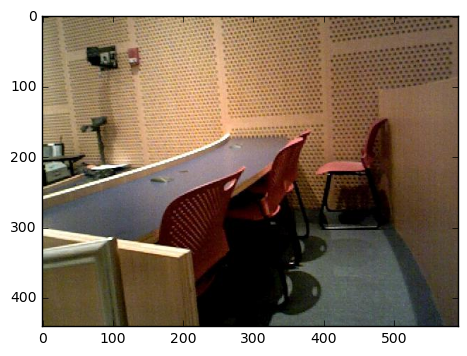

In [19]:
plt.imshow(img/255.)